Biyoinformatik makine öğrenmesi için:
İlk adım veri kümesi oluşturmak olacak. Örnek bir veri kümesi olarak, DNA, RNA veya protein dizilimlerine dair veriler kullanılabilir. Burada **sınıflandırma işlemi** yapacağımızı düşünürsek, örneğin belirli genetik özelliklere göre hastalık riski taşıyan ve taşımayan bireylerin sınıflandırılması güzel bir proje konusu olabilir.

1. **Veri Kümesi Oluşturma:**
   - Örnek veri olarak insan genomu dizilimlerinden alınan verileri kullanabiliriz. Ya da, literatürde yer alan hazır veri kümelerini alıp işleyebiliriz. Kaggle gibi platformlardan biyoinformatik veri setleri bulmak mümkün. Örnek olarak, **Breast Cancer Gene Expression** veya **Human Gene Mutation Data** gibi veri kümelerini kullanabiliriz.
   - Eğer kendimiz bir veri oluşturacaksak, örneğin her satırda bireylere ait genetik bilgi ve bir sınıf (hastalıklı/hastalıksız) yer alabilir.

2. **Veri Ön İşleme:**
   - Veride eksik değerlerin doldurulması, gereksiz sütunların kaldırılması gibi işlemler yapılmalıdır.
   - Genetik veriler üzerinde normalizasyon gerekebilir, çünkü gen dizilimlerinin boyutları oldukça büyük olabilir.

3. **Özellik Seçimi (Feature Selection):**
   - Genetik veride çok fazla özellik bulunabileceği için en anlamlı özelliklerin seçilmesi önemlidir. Örneğin, belirli mutasyonların veya gen ifadelerinin hastalıklarla ilişkili olup olmadığını bulmak için **PCA (Principal Component Analysis)** veya **mutual information** gibi teknikler kullanılabilir.

4. **Model Oluşturma:**
   - Sınıflandırma işlemi için **Naive Bayes, Lojistik Regresyon, Destek Vektör Makineleri (SVM)** gibi modelleri kullanabiliriz.
   - Eğer isterseniz, daha gelişmiş modellerle (örneğin CNN) genetik dizilimlerdeki örüntüleri de sınıflandırabilirsiniz.

5. **Model Eğitimi ve Değerlendirme:**
   - Eğitim ve test seti olarak veriyi ayırırız. Daha sonra modeli eğitip, **accuracy, precision, recall** gibi metriklerle değerlendirebiliriz.

Örnek Veri Kümesi:

| ID  | Genetik Veri (G1, G2, G3...) | Sınıf (Hastalık Riski: 0 veya 1) |
|-----|------------------------------|---------------------------------|
| 1   | GATTACA...                    | 0                               |
| 2   | CGTACGA...                    | 1                               |



In [ ]:
import pandas as pd
import random

# Veri kümesi için örnek genetik veriler ve sınıflar oluşturuluyor
def random_genetic_data():
    """ Rastgele genetik veri üretir. """
    return ''.join(random.choices(['A', 'T', 'G', 'C'], k=10))

# 100 örnek veri oluşturuyoruz
data = {
    'ID': [i for i in range(1, 101)],
    'Genetic_Data': [random_genetic_data() for _ in range(100)],
    'Class': [random.choice([0, 1]) for _ in range(100)]  # 0: Hastalıksız, 1: Hastalık Riski
}

# Veri çerçevesine dönüştürme
df = pd.DataFrame(data)

# Dosya olarak kaydetme
file_path = 'genetik_veri.csv'
df.to_csv(file_path, index=False)

file_path


'genetik_veri.csv'

**CountVectorizer:** Genetik dizileri (ATGC gibi) sayısal vektörlere dönüştürmek için kullanılır. Burada, iki nükleotidden oluşan "bigram"lar oluşturduk. Bu sayısal veriler, makine öğrenmesi algoritmalarıyla çalışmak için kullanılır.

**Logistic Regression:** Basit bir sınıflandırma algoritması. Hastalık riski olan/olmayan bireyleri tahmin eder.

**Model Performansı:** Modelin doğruluk oranını (accuracy) ve sınıflandırma raporunu (classification_report) yazdırır. Bu raporda precision, recall ve F1-score gibi performans ölçütleri bulunur.

In [ ]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

file_path = 'genetik_veri.csv'

# 1. Veri Kümesini Yükleme
df = pd.read_csv(file_path)

# 2. Veri Ön İşleme
# Genetik veri dizilimlerini sayısal verilere dönüştürmek için CountVectorizer kullanacağız
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))  # Karakter bazlı n-gram
X = vectorizer.fit_transform(df['Genetic_Data'])  # Genetik veriyi dönüştürüyoruz
y = df['Class']  # Sınıf etiketleri

# 3. Veriyi Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seyrek veriyi yoğun formata dönüştürme (Naive Bayes için)
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# 4. Farklı Makine Öğrenmesi Modellerini Eğitme ve Performans Analizi
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Sonuçları saklamak için bir liste
results = []

for model_name, model in models.items():
    # Modeli eğitme
    if model_name == 'Naive Bayes':
        model.fit(X_train_dense, y_train)  # Yoğun veri kullan
    else:
        model.fit(X_train, y_train)  # Seyrek veri kullan

    # Test setinde tahmin yapma
    y_pred = model.predict(X_test_dense if model_name == 'Naive Bayes' else X_test)

    # Doğruluk hesaplama
    accuracy = accuracy_score(y_test, y_pred)

    # Sonuçları listeye ekleme
    results.append({'Model': model_name, 'Accuracy': accuracy})

    # Model performansını yazdırma
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Sonuçları DataFrame'e dönüştürme
results_df = pd.DataFrame(results)

# Sonuçları gösterme
print("\nTüm Modellerin Performansı:")
print(results_df)


Model: Logistic Regression
Accuracy: 65.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.67      0.83      0.74        12

    accuracy                           0.65        20
   macro avg       0.63      0.60      0.60        20
weighted avg       0.64      0.65      0.63        20

Model: Random Forest
Accuracy: 60.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.62      0.83      0.71        12

    accuracy                           0.60        20
   macro avg       0.56      0.54      0.52        20
weighted avg       0.57      0.60      0.56        20

Model: Support Vector Machine
Accuracy: 65.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.65      0.92   

In [ ]:
import pandas as pd
import random

# Veri kümesi için örnek genetik veriler ve sınıflar oluşturuluyor
def random_genetic_data(length):
    """ Rastgele genetik veri üretir. Uzunluk parametresi ile belirlenir. """
    return ''.join(random.choices(['A', 'T', 'G', 'C'], k=length))

# 100 örnek veri oluşturuyoruz
data = {
    'ID': [i for i in range(1, 101)],
    'Genetic_Data': [random_genetic_data(random.randint(5, 15)) for _ in range(100)],  # 5 ile 15 arasında rastgele uzunluk
    'Class': [random.choice([0, 1]) for _ in range(100)]  # 0: Hastalıksız, 1: Hastalık Riski
}

# Veri çerçevesine dönüştürme
df = pd.DataFrame(data)

# Dosya olarak kaydetme
file_path = 'variable_length_genetik_veri.csv'
df.to_csv(file_path, index=False)

# Dosya yolunu yazdırma
print(f"Veri kümesi '{file_path}' olarak kaydedildi.")


Veri kümesi 'variable_length_genetik_veri.csv' olarak kaydedildi.


In [ ]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

file_path = 'variable_length_genetik_veri.csv'

# 1. Veri Kümesini Yükleme
df = pd.read_csv(file_path)

# 2. Veri Ön İşleme
# Genetik veri dizilimlerini sayısal verilere dönüştürmek için CountVectorizer kullanacağız
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))  # Karakter bazlı n-gram
X = vectorizer.fit_transform(df['Genetic_Data'])  # Genetik veriyi dönüştürüyoruz
y = df['Class']  # Sınıf etiketleri

# 3. Veriyi Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seyrek veriyi yoğun formata dönüştürme (Naive Bayes için)
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# 4. Farklı Makine Öğrenmesi Modellerini Eğitme ve Performans Analizi
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Sonuçları saklamak için bir liste
results = []

for model_name, model in models.items():
    # Modeli eğitme
    if model_name == 'Naive Bayes':
        model.fit(X_train_dense, y_train)  # Yoğun veri kullan
    else:
        model.fit(X_train, y_train)  # Seyrek veri kullan

    # Test setinde tahmin yapma
    y_pred = model.predict(X_test_dense if model_name == 'Naive Bayes' else X_test)

    # Doğruluk hesaplama
    accuracy = accuracy_score(y_test, y_pred)

    # Sonuçları listeye ekleme
    results.append({'Model': model_name, 'Accuracy': accuracy})

    # Model performansını yazdırma
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Sonuçları DataFrame'e dönüştürme
results_df = pd.DataFrame(results)

# Sonuçları gösterme
print("\nTüm Modellerin Performansı:")
print(results_df)


Model: Logistic Regression
Accuracy: 40.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        12
           1       0.38      0.75      0.50         8

    accuracy                           0.40        20
   macro avg       0.44      0.46      0.38        20
weighted avg       0.45      0.40      0.35        20

Model: Random Forest
Accuracy: 65.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.53      1.00      0.70         8

    accuracy                           0.65        20
   macro avg       0.77      0.71      0.64        20
weighted avg       0.81      0.65      0.63        20

Model: Support Vector Machine
Accuracy: 50.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        12
           1       0.44      1.00   

Model: Logistic Regression
Accuracy: 40.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        12
           1       0.38      0.75      0.50         8

    accuracy                           0.40        20
   macro avg       0.44      0.46      0.38        20
weighted avg       0.45      0.40      0.35        20

Model: Random Forest
Accuracy: 60.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.42      0.56        12
           1       0.50      0.88      0.64         8

    accuracy                           0.60        20
   macro avg       0.67      0.65      0.60        20
weighted avg       0.70      0.60      0.59        20

Model: Support Vector Machine
Accuracy: 50.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        12
           1       0.44      1.00   

<ipython-input-44-4a01adf30aa9>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


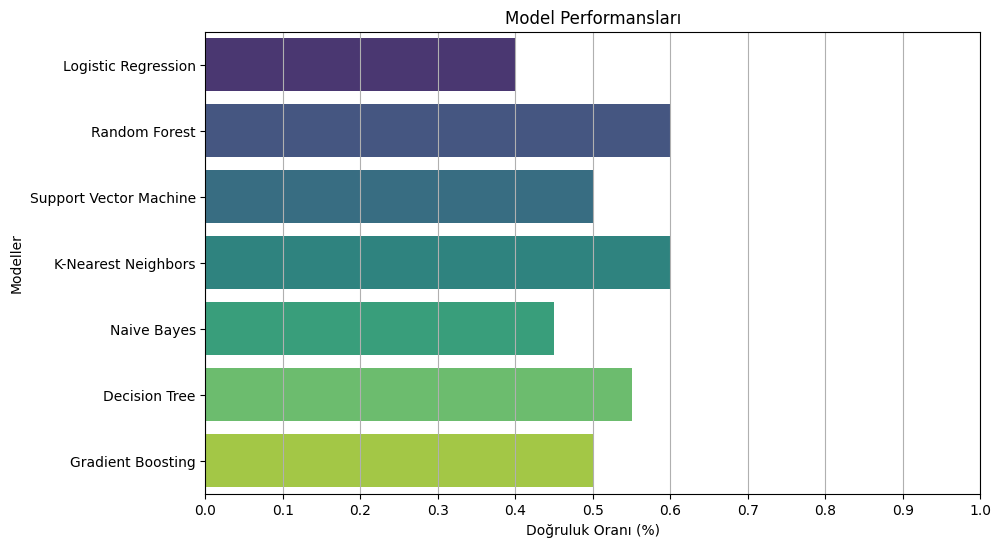

In [44]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Veri kümesi dosya yolu
file_path = 'variable_length_genetik_veri.csv'

# 1. Veri Kümesini Yükleme
df = pd.read_csv(file_path)

# 2. Veri Ön İşleme
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))  # Karakter bazlı n-gram
X = vectorizer.fit_transform(df['Genetic_Data'])  # Genetik veriyi dönüştürüyoruz
y = df['Class']  # Sınıf etiketleri

# 3. Veriyi Eğitim ve Test Setlerine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seyrek veriyi yoğun formata dönüştürme (Naive Bayes için)
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# 4. Farklı Makine Öğrenmesi Modellerini Eğitme ve Performans Analizi
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Sonuçları saklamak için bir liste
results = []

for model_name, model in models.items():
    # Modeli eğitme
    if model_name == 'Naive Bayes':
        model.fit(X_train_dense, y_train)  # Yoğun veri kullan
    else:
        model.fit(X_train, y_train)  # Seyrek veri kullan

    # Test setinde tahmin yapma
    y_pred = model.predict(X_test_dense if model_name == 'Naive Bayes' else X_test)

    # Doğruluk hesaplama
    accuracy = accuracy_score(y_test, y_pred)

    # Sonuçları listeye ekleme
    results.append({'Model': model_name, 'Accuracy': accuracy})

    # Model performansını yazdırma
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Sonuçları DataFrame'e dönüştürme
results_df = pd.DataFrame(results)

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Performansları')
plt.xlabel('Doğruluk Oranı (%)')
plt.ylabel('Modeller')
plt.xlim(0, 1)  # Yüzde için 0-1 aralığı
plt.xticks([i/10 for i in range(0, 11)])  # X ekseninde 0-100 arası yüzdeleri göster
plt.grid(axis='x')
plt.show()
